In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold

In [63]:
random_state = 42
raw_dataset = pd.read_csv("./data/processed_data_encoded.csv") #data has X and Y
X = raw_dataset.drop(columns=["DR"])
Y = pd.DataFrame(raw_dataset["DR"])
# Slice your data


X_FOR_FOLDS, X_FINAL_TEST, Y_FOR_FOLDS, Y_FINAL_TEST = train_test_split(X, Y, test_size=0.1, random_state=random_state, stratify=Y)
real_data = pd.concat([X_FOR_FOLDS, Y_FOR_FOLDS], axis=1)
# real_data.reset_index(drop=True, inplace=True)
# real_data = real_data.drop(columns=["Height", "Weight"])


In [64]:
real_data.describe()

,Age,Gender,Community,UAlb,Ucr,UACR,TC,TG,TCTG,LDLC,HDLC,Scr,BUN,FPG,HbA1c,Height,Weight,BMI,Duration,DR
count,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000,5742.000000
mean,63.800766,0.549983,4.634100,49.823755,4873.045280,71.036695,5.348884,1.842762,4.404497,3.217346,1.334314,61.603448,5.971891,8.891797,7.296848,161.592128,64.288941,24.609103,7.819105,0.101010
std,7.483781,0.497539,2.963937,124.383230,6063.166596,1140.344876,1.131424,2.191222,2.654190,0.953018,0.312538,19.882489,1.651482,2.647467,1.475932,7.599457,12.031707,4.537096,5.841676,0.301368
min,34.000000,0.000000,0.000000,0.100000,0.000000,0.100000,2.100000,0.100000,0.550000,0.220000,0.600000,26.000000,1.600000,4.000000,3.100000,82.000000,36.000000,15.060000,0.100000,0.000000
25%,59.000000,0.000000,2.000000,5.300000,7.000000,5.800000,4.622500,0.920000,2.540000,2.570000,1.110000,50.000000,4.900000,7.100000,6.200000,156.000000,57.800000,22.490000,2.600000,0.000000
50%,64.000000,1.000000,5.000000,12.300000,17.000000,12.150000,5.270000,1.380000,3.810000,3.200000,1.290000,59.000000,5.800000,8.300000,7.000000,161.000000,64.000000,24.220000,6.300000,0.000000
75%,69.000000,1.000000,7.000000,33.100000,9223.750000,33.275000,5.980000,2.090000,5.690000,3.820000,1.520000,69.000000,6.800000,9.900000,8.100000,168.000000,70.000000,26.170000,12.000000,0.000000
max,92.000000,1.000000,9.000000,1065.000000,22726.000000,85427.700000,25.000000,82.400000,26.820000,8.640000,3.180000,610.000000,23.900000,30.000000,13.900000,188.000000,564.000000,250.670000,33.000000,1.000000


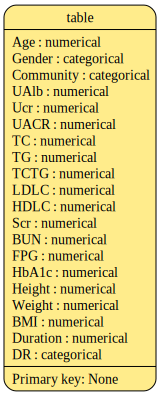

In [65]:
# from sdv.tabular import CTGAN
import sdv
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(data=real_data)

# metadata.update_column(column_name="Age", sdtype="numerical", computer_representation="UInt8")
metadata.validate()
metadata.visualize()

In [67]:

from sdv.single_table import CTGANSynthesizer
from sdv.single_table import TVAESynthesizer

# synthesizer = CTGANSynthesizer(metadata=metadata, enforce_min_max_values=True, enforce_rounding=True, epochs = 500, verbose=True), cuda=True)

synthesizer = TVAESynthesizer(metadata=metadata, 
                              enforce_min_max_values=True, 
                              enforce_rounding=True, 
                              epochs = 200,
                              verbose=True, 
                              cuda=True,
                              batch_size=512,)


synthesizer.fit(real_data)
synthetic_data = synthesizer.sample(
                                    num_rows=500,
                                    batch_size=512,
                                    )

KeyboardInterrupt: 

In [62]:
synthetic_data.describe()

,Age,Gender,UAlb,Ucr,UACR,TC,TG,TCTG,LDLC,HDLC,Scr,BUN,FPG,HbA1c,Height,Weight,BMI,Duration,DR
count,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000
mean,64.627539,0.532813,30.462070,4635.015625,38.062422,5.217611,1.721396,4.386988,3.214498,1.313535,59.004492,5.180977,9.521367,7.552520,161.387305,63.219102,24.522379,5.267324,0.029297
std,5.733802,0.498971,64.644714,5751.873655,90.981302,0.992963,1.324386,2.089343,0.864968,0.288238,15.714120,1.090188,3.523691,1.763872,7.106685,10.010447,3.149104,5.662376,0.168654
min,36.000000,0.000000,0.100000,0.000000,0.100000,2.370000,0.150000,0.550000,0.790000,0.690000,26.000000,2.600000,4.000000,4.300000,140.000000,36.000000,15.820000,0.100000,0.000000
25%,61.000000,0.000000,5.900000,3.000000,7.700000,4.560000,0.940000,2.837500,2.630000,1.100000,49.000000,4.400000,6.900000,6.200000,156.000000,56.800000,22.410000,1.400000,0.000000
50%,64.000000,1.000000,12.800000,151.000000,16.150000,5.170000,1.350000,3.885000,3.180000,1.250000,57.000000,5.100000,8.800000,7.100000,161.000000,64.300000,24.300000,2.100000,0.000000
75%,69.000000,1.000000,29.700000,8406.250000,31.600000,5.870000,2.120000,5.620000,3.770000,1.502500,67.000000,5.700000,11.100000,8.500000,168.000000,69.700000,26.210000,7.425000,0.000000
max,81.000000,1.000000,1065.000000,21401.000000,2360.400000,12.220000,19.820000,16.760000,7.610000,2.550000,200.000000,16.100000,29.200000,13.900000,181.000000,132.100000,62.520000,27.700000,1.000000


In [68]:
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality
from sdv.evaluation.single_table import get_column_plot
import sdv
from sdv.metadata import Metadata


metadata = Metadata.detect_from_dataframe(data=real_data)
metadata.validate()
metadata.visualize()
# 1. perform basic validity checks
diagnostic = run_diagnostic(real_data, synthetic_data, metadata)

# 2. measure the statistical similarity
quality_report = evaluate_quality(real_data, synthetic_data, metadata)


Generating report ...

(1/2) Evaluating Data Validity: |██████████| 20/20 [00:00<00:00, 2103.94it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 499.80it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 20/20 [00:00<00:00, 41.32it/s]|
Column Shapes Score: 89.91%

(2/2) Evaluating Column Pair Trends: |██████████| 190/190 [00:00<00:00, 300.35it/s]|
Column Pair Trends Score: 85.21%

Overall Score (Average): 87.56%



In [71]:
# 3. plot the data
print(real_data.columns)
print(synthetic_data.columns)
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata,
    column_name='BMI', #change this u decide
    plot_type='distplot', #change this u decide , distplot``, ``bar``
)
    
fig.show()

Index(['Age', 'Gender', 'Community', 'UAlb', 'Ucr', 'UACR', 'TC', 'TG', 'TCTG',
       'LDLC', 'HDLC', 'Scr', 'BUN', 'FPG', 'HbA1c', 'Height', 'Weight', 'BMI',
       'Duration', 'DR'],
      dtype='object')
Index(['Age', 'Gender', 'Community', 'UAlb', 'Ucr', 'UACR', 'TC', 'TG', 'TCTG',
       'LDLC', 'HDLC', 'Scr', 'BUN', 'FPG', 'HbA1c', 'Height', 'Weight', 'BMI',
       'Duration', 'DR'],
      dtype='object')
